# Preliminary plotting stuff to get things going

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams

In [3]:
import brewer2mpl
from matplotlib import rcParams

#colorbrewer2 Dark2 qualitative color table
dark2_cmap = brewer2mpl.get_map('Dark2', 'Qualitative', 7)
dark2_colors = dark2_cmap.mpl_colors

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

# Loading and Cleaning

In [5]:
df=pd.read_csv("games.csv")
df.head(5)

,date_time,winner,score_winner,odd_winner,looser,score_looser,odd_looser,overtime,available_bookmaker_odds
0,2015-04-09T01:00:00.000Z,Boston Celtics,113,1.81,Detroit Pistons,103,2.05,False,13
1,2015-04-09T01:00:00.000Z,Orlando Magic,105,3.74,Chicago Bulls,103,1.29,False,13
2,2015-04-08T04:30:00.000Z,Los Angeles Clippers,105,1.02,Los Angeles Lakers,100,17.34,False,13
3,2015-04-08T04:00:00.000Z,Sacramento Kings,116,1.23,Minnesota Timberwolves,111,4.43,False,13
4,2015-04-08T02:00:00.000Z,New Orleans Pelicans,103,2.62,Golden State Warriors,100,1.52,False,13


In [6]:
df.describe()

,score_winner,odd_winner,score_looser,odd_looser,overtime,available_bookmaker_odds
count,1400.000000,1400.00000,1400.000000,1400.000000,1400,1400.000000
mean,105.557857,-7.79725,94.542143,8.805843,0.0635714,12.919286
std,10.394963,115.08015,10.614888,72.806333,0.244075,0.287802
min,69.000000,-2500.00000,65.000000,-417.000000,False,12.000000
25%,99.000000,1.25750,87.000000,1.740000,0,13.000000
50%,105.000000,1.54000,94.000000,2.560000,0,13.000000
75%,112.000000,2.14000,101.000000,4.090000,0,13.000000
max,163.000000,324.00000,158.000000,1331.000000,True,14.000000


In [3]:
a = 'hello world' 
2 + 2 

4

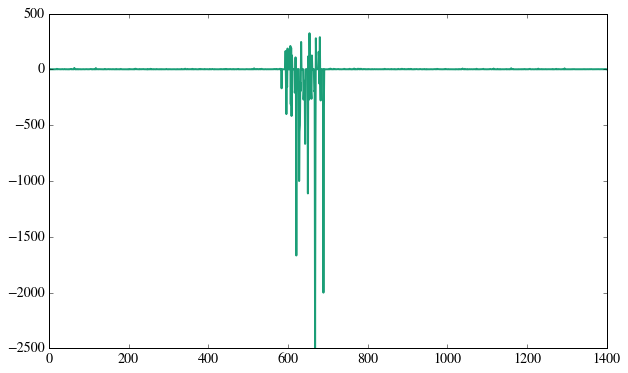

In [33]:
line = plt.figure()
plt.plot(df["odd_winner"]);

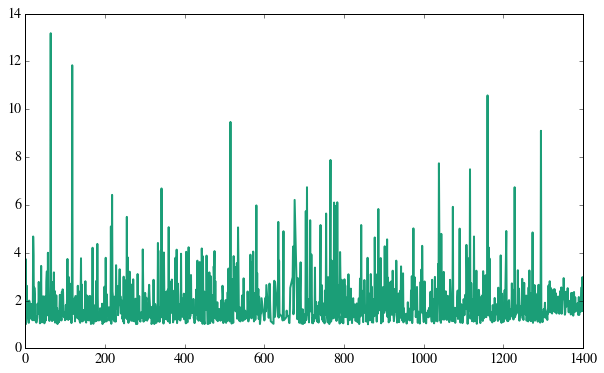

In [32]:
games_cleaned = df.loc[df["odd_winner"]<50,:] #I get rid of a lot of data like this
games_cleaned = games_cleaned.loc[games_cleaned["odd_winner"]>=0,:]
plt.figure()
plt.plot(games_cleaned["odd_winner"]);

In [10]:
games_cleaned.describe()

,score_winner,odd_winner,score_looser,odd_looser,overtime,available_bookmaker_odds
count,1350.000000,1350.000000,1350.000000,1350.000000,1350,1350.000000
mean,105.552593,1.893963,94.542963,3.431244,0.0659259,12.929630
std,10.248136,1.087111,10.502039,2.771264,0.248245,0.272695
min,69.000000,1.010000,65.000000,1.040000,False,12.000000
25%,99.000000,1.262500,88.000000,1.750000,0,13.000000
50%,105.000000,1.550000,94.000000,2.545000,0,13.000000
75%,112.000000,2.140000,101.000000,3.985000,0,13.000000
max,144.000000,13.180000,143.000000,21.190000,True,14.000000


In [11]:
games_cleaned.dtypes

date_time                    object
winner                       object
score_winner                  int64
odd_winner                  float64
looser                       object
score_looser                  int64
odd_looser                  float64
overtime                       bool
available_bookmaker_odds      int64
dtype: object

## Preliminary Analysis and plotting

In [12]:
winner_group = games_cleaned.groupby('winner')
winner_group.size()

winner
Atlanta Hawks             70
Boston Celtics            42
Brooklyn Nets             43
Charlotte Hornets         36
Chicago Bulls             57
Cleveland Cavaliers       68
Dallas Mavericks          53
Denver Nuggets            30
Detroit Pistons           33
Golden State Warriors     86
Houston Rockets           69
Indiana Pacers            37
Los Angeles Clippers      62
Los Angeles Lakers        23
Memphis Grizzlies         61
Miami Heat                39
Milwaukee Bucks           42
Minnesota Timberwolves    19
New Orleans Pelicans      49
New York Knicks           20
Oklahoma City Thunder     43
Orlando Magic             25
Philadelphia 76ers        19
Phoenix Suns              43
Portland Trail Blazers    53
Sacramento Kings          28
San Antonio Spurs         57
Toronto Raptors           51
Utah Jazz                 40
Washington Wizards        52
dtype: int64

In [13]:
def nb_of_games(team):
    return len(games_cleaned.loc[games_cleaned["winner"] == team])+len(games_cleaned.loc[games_cleaned["looser"] == team])

In [14]:
teams = set(games_cleaned["winner"]).union(set(games_cleaned["looser"]))
teams

{'Atlanta Hawks',
 'Boston Celtics',
 'Brooklyn Nets',
 'Charlotte Hornets',
 'Chicago Bulls',
 'Cleveland Cavaliers',
 'Dallas Mavericks',
 'Denver Nuggets',
 'Detroit Pistons',
 'Golden State Warriors',
 'Houston Rockets',
 'Indiana Pacers',
 'Los Angeles Clippers',
 'Los Angeles Lakers',
 'Memphis Grizzlies',
 'Miami Heat',
 'Milwaukee Bucks',
 'Minnesota Timberwolves',
 'New Orleans Pelicans',
 'New York Knicks',
 'Oklahoma City Thunder',
 'Orlando Magic',
 'Philadelphia 76ers',
 'Phoenix Suns',
 'Portland Trail Blazers',
 'Sacramento Kings',
 'San Antonio Spurs',
 'Toronto Raptors',
 'Utah Jazz',
 'Washington Wizards'}

In [15]:
games_cleaned.loc[games_cleaned["winner"] == "West"] #in df there is the allstar game, not in games_cleaned

,date_time,winner,score_winner,odd_winner,looser,score_looser,odd_looser,overtime,available_bookmaker_odds


In [16]:
x = list(teams)
y = [nb_of_games(t) for t in x]
# red_dot = plt.plot(y,"ro")
# plt.legend(red_dot,x)

In [17]:
total_games = pd.DataFrame([x,y])
total_games

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,New York Knicks,Los Angeles Lakers,Memphis Grizzlies,San Antonio Spurs,Philadelphia 76ers,Detroit Pistons,Boston Celtics,Miami Heat,Orlando Magic,Portland Trail Blazers,Golden State Warriors,Chicago Bulls,Washington Wizards,Houston Rockets,Dallas Mavericks,Minnesota Timberwolves,Los Angeles Clippers,Oklahoma City Thunder,Charlotte Hornets,Milwaukee Bucks,Toronto Raptors,Utah Jazz,Phoenix Suns,Sacramento Kings,New Orleans Pelicans,Cleveland Cavaliers,Atlanta Hawks,Brooklyn Nets,Indiana Pacers,Denver Nuggets
1,85,86,96,90,86,83,90,85,84,89,108,96,94,102,90,84,99,84,87,90,88,86,85,82,87,104,100,91,84,85


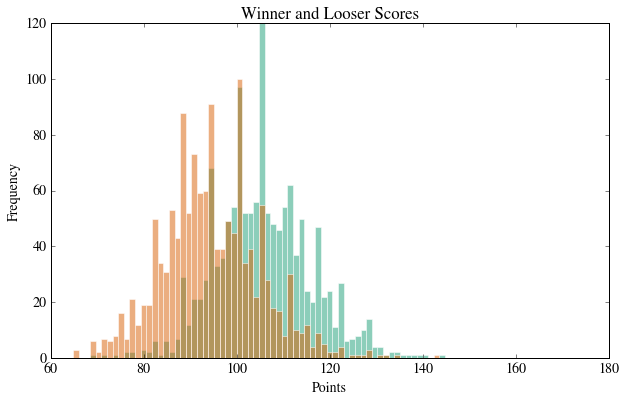

In [31]:
plt.figure()
bins = np.linspace(60, 180, 100)
plt.title("Winner and Looser Scores")
plt.xlabel("Points")
plt.ylabel("Frequency")
plt.hist(games_cleaned["score_winner"],bins, alpha=0.5)
plt.hist(games_cleaned["score_looser"],bins, alpha=0.5)
plt.show()

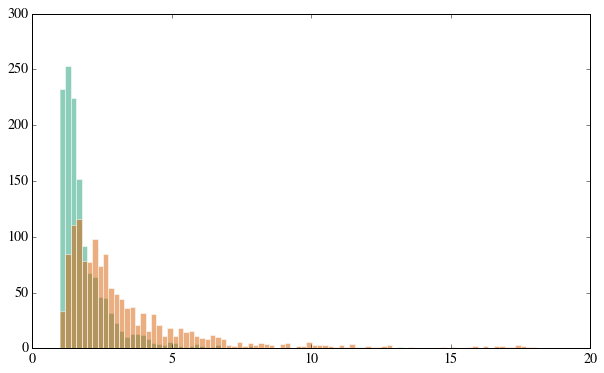

In [30]:
plt.figure()
bins = np.linspace(1, 20, 100)
plt.hist(games_cleaned["odd_winner"],bins, alpha=0.5);
plt.hist(games_cleaned["odd_looser"],bins, alpha=0.5);

## Feature Engineering

In [20]:
g = games_cleaned
g.head()

,date_time,winner,score_winner,odd_winner,looser,score_looser,odd_looser,overtime,available_bookmaker_odds
0,2015-04-09T01:00:00.000Z,Boston Celtics,113,1.81,Detroit Pistons,103,2.05,False,13
1,2015-04-09T01:00:00.000Z,Orlando Magic,105,3.74,Chicago Bulls,103,1.29,False,13
2,2015-04-08T04:30:00.000Z,Los Angeles Clippers,105,1.02,Los Angeles Lakers,100,17.34,False,13
3,2015-04-08T04:00:00.000Z,Sacramento Kings,116,1.23,Minnesota Timberwolves,111,4.43,False,13
4,2015-04-08T02:00:00.000Z,New Orleans Pelicans,103,2.62,Golden State Warriors,100,1.52,False,13


In [21]:
# Create a feature that says "the lowest odd wins"
y = g["odd_winner"]<=g["odd_looser"]
y.head()

0     True
1    False
2     True
3     True
4    False
dtype: bool

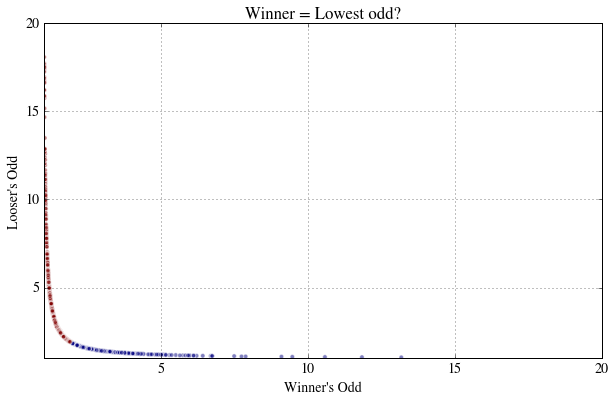

In [22]:
# plot the (odd_winner, odd_looser) graph with two different labels given the value of y
plt.figure()
plt.title("Winner = Lowest odd?")
plt.xlabel("Winner's Odd")
plt.ylabel("Looser's Odd")
# plt.legend(["the lowest odd won","the highest odd won"])
plt.scatter(g["odd_winner"],g["odd_looser"],c=y,alpha=0.5)
plt.grid(True)
plt.axis([1,20,1,20])
plt.show()

Games 1 and 4 are prolblematic for a better because the odds were predicting a different outcome than the real one.

So we built a feature y measuring *if the lowest odd wins*.

We then are trying to apply **supervised learning methods** to build a classifier able to predict with more certainty if the lowest odd is right.

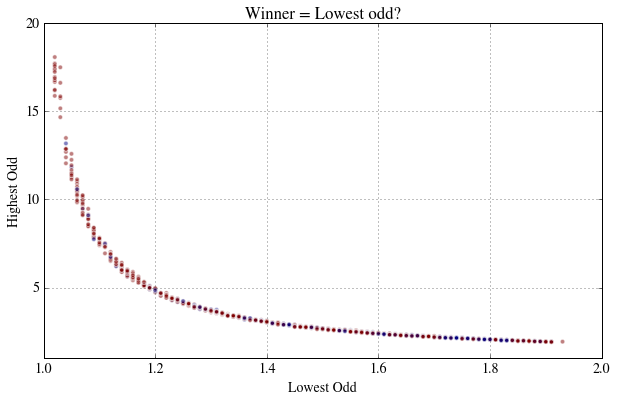

In [23]:
# plot the (odd_winner, odd_looser) graph with two different labels given the value of y
plt.figure()
plt.title("Winner = Lowest odd?")
plt.xlabel("Lowest Odd")
plt.ylabel("Highest Odd")
# plt.legend(["the lowest odd won","the highest odd won"])
mini = g.loc[:,["odd_winner","odd_looser"]].min(axis=1)
maxi = g.loc[:,["odd_winner","odd_looser"]].max(axis=1)
plt.scatter(mini,maxi,c=y,alpha=0.5)
plt.grid(True)
plt.axis([1,2,1,20])
plt.show()

(array([ 405.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  945.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

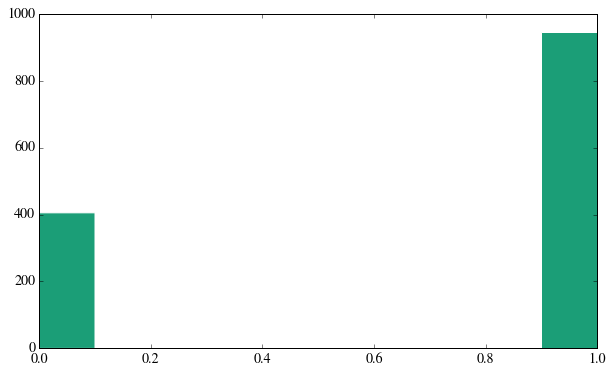

In [24]:
# Accuracy of classifier
plt.hist(y)

In [25]:
a=945*100/(405+945)
a

70

The accuracy of the classifier "the lowest odd wins" is already 70%.

In [27]:
surprise = g.loc[y==False]

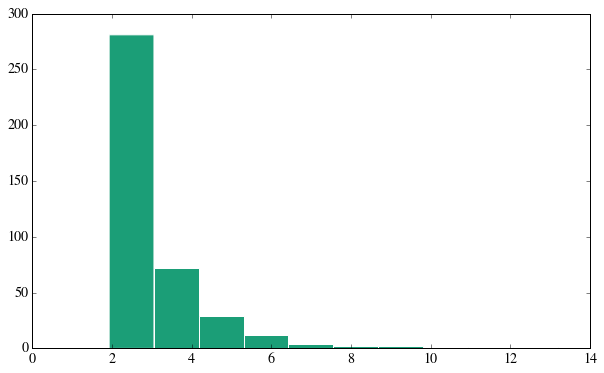

In [29]:
plt.hist(surprise["odd_winner"]);

In [40]:
a = df.loc[df["odd_winner"]>=50,:]
b = df.loc[df["odd_winner"]<-50,:]
us_odds = pd.concat([a,b])

In [43]:
#02 fevrier au 21 février are faulty = US odds
us_odds.loc[us_odds["odd_winner"]>=0]["odd_winner"]/100+1

594    2.65
599    2.87
606    3.10
608    2.93
610    2.25
619    2.08
633    3.46
651    2.18
652    2.06
654    4.24
660    2.25
670    3.79
677    2.58
678    2.06
680    3.89
Name: odd_winner, dtype: float64

In [47]:
-100/us_odds.loc[us_odds["odd_winner"]<0]["odd_winner"]+1

584    1.591716
595    1.719424
596    1.250000
597    1.813008
598    1.641026
607    1.320513
609    1.239808
617    1.480769
618    1.571429
620    1.671141
621    1.059988
622    1.480769
628    1.100000
629    1.179856
630    1.200000
631    1.847458
632    1.520833
639    1.370370
640    1.500000
641    1.420168
642    1.980392
643    1.149925
650    1.090009
653    1.370370
658    1.480769
659    1.380228
666    1.510204
667    1.529101
668    1.040000
669    1.160000
679    1.781250
681    1.689655
682    1.359712
689    1.050000
690    1.300300
Name: odd_winner, dtype: float64